In [88]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF 

In [89]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [90]:
cv = CountVectorizer(min_df = 3, stop_words = 'english')
tfidf = TfidfTransformer(smooth_idf = False)
cvDataset = cv.fit_transform(dataset.data)
tfidfDataset = tfidf.fit_transform(cvDataset)

In [91]:
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=2000, n_init=30, n_jobs=-1)
kmeansPredict = kmeans.fit_predict(tfidfDataset)

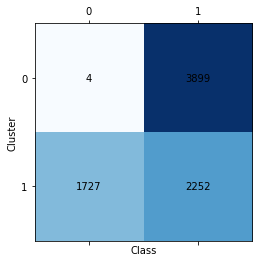

In [92]:
convertDataset = np.copy(dataset.target)

convertDataset[np.where(dataset.target < 4)] = 0
convertDataset[np.where(dataset.target >= 4)] = 1

fig, ax = plt.subplots()
ax.matshow(contingency_matrix(convertDataset,kmeansPredict), cmap=plt.cm.Blues)
plt.xlabel('Class')
plt.ylabel('Cluster')

for i in range(2):
    for j in range(2):
        c = contingency_matrix(convertDataset,kmeansPredict)[j,i]
        ax.text(i, j, str(c), va = 'center', ha = 'center')

In [93]:
print("Homogeneity score: ", homogeneity_score(convertDataset, kmeansPredict))
print("Completeness score: ",completeness_score(convertDataset, kmeansPredict))
print("V Measure score: ",v_measure_score(convertDataset, kmeansPredict))
print("Adjusted Rand score: ",adjusted_rand_score(convertDataset, kmeansPredict))
print("Adjusted Mutual score: ",adjusted_mutual_info_score(convertDataset, kmeansPredict))

Homogeneity score:  0.25524533029125557
Completeness score:  0.3360642181760738
V Measure score:  0.29013170035817176
Adjusted Rand score:  0.18270954372564327
Adjusted Mutual score:  0.29005781968046146


Text(0, 0.5, 'percent of variance (%)')

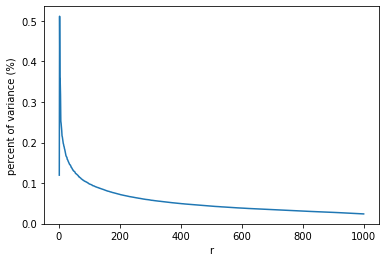

In [94]:
svd = TruncatedSVD(n_components = 1000, random_state = 0)
svdDataset = svd.fit_transform(tfidfDataset)
svdDatasetRecover = svd.inverse_transform(svdDataset)
svdDatasetComponents = svd.components_

dataset_singular = svd.singular_values_
datasetExplainedRatio = svd.explained_variance_ratio_

plt.plot(np.arange(1000) + 1, datasetExplainedRatio * 100)

plt.xlabel('r')
plt.ylabel('percent of variance (%)')

In [95]:
Rvals = [1,2,3,5,10,20,50,100,300]
predictedDataset = []

for r in list(Rvals):
    get = svdDataset[:,:r]
    predictedDataset.append(kmeans.fit_predict(get))
    
    nmf = NMF(n_components = r, init = 'random', random_state = 0)
    get = nmf.fit_transform(tfidfDataset)
    predictedDataset.append(kmeans.fit_predict(get))
    print("Finished Rval: ", r)


Finished Rval:  1
Finished Rval:  2
Finished Rval:  3
Finished Rval:  5
Finished Rval:  10
Finished Rval:  20
Finished Rval:  50
Finished Rval:  100
Finished Rval:  300


In [96]:
hScore = []
cScore = []
vmScore = []
arScore = []
amScore = []

svdPredictedDataset = []
nmfPredictedDataset = []

for i in range(len(predictedDataset)):
    if i % 2 == 0:
        svdPredictedDataset.append(predictedDataset[i])
    else:
        nmfPredictedDataset.append(predictedDataset[i])  

for prediction in list(svdPredictedDataset):
    hScore.append(homogeneity_score(convertDataset, prediction))
    cScore.append(completeness_score(convertDataset, prediction))
    vmScore.append(v_measure_score(convertDataset, prediction))
    arScore.append(adjusted_rand_score(convertDataset, prediction))
    amScore.append(adjusted_mutual_info_score(convertDataset, prediction))

for prediction in list(nmfPredictedDataset):
    hScore.append(homogeneity_score(convertDataset, prediction))
    cScore.append(completeness_score(convertDataset, prediction))
    vmScore.append(v_measure_score(convertDataset, prediction))
    arScore.append(adjusted_rand_score(convertDataset, prediction))
    amScore.append(adjusted_mutual_info_score(convertDataset, prediction))
    

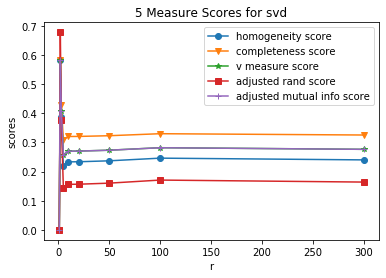

In [97]:
plt.plot(Rvals, hScore[0:9], marker='o')
plt.plot(Rvals, cScore[0:9], marker='v')
plt.plot(Rvals, vmScore[0:9], marker='*')
plt.plot(Rvals, arScore[0:9], marker='s')
plt.plot(Rvals, amScore[0:9], marker='+')

plt.title('5 Measure Scores for svd')
plt.xlabel('r')
plt.ylabel('scores')
plt.legend(['homogeneity score','completeness score', 'v measure score', 'adjusted rand score', 'adjusted mutual info score'])

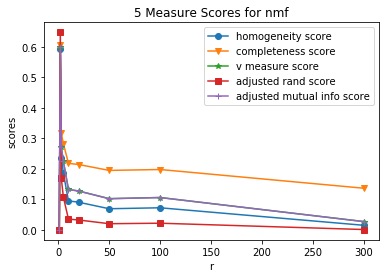

In [98]:
plt.plot(Rvals, hScore[9:18], marker='o')
plt.plot(Rvals, cScore[9:18], marker='v')
plt.plot(Rvals, vmScore[9:18], marker='*')
plt.plot(Rvals, arScore[9:18], marker='s')
plt.plot(Rvals, amScore[9:18], marker='+')

plt.title('5 Measure Scores for nmf')
plt.xlabel('r')
plt.ylabel('scores')
plt.legend(['homogeneity score','completeness score', 'v measure score', 'adjusted rand score', 'adjusted mutual info score'])